## Exploratory Data Analysis

https://www.kaggle.com/code/imoore/intro-to-exploratory-data-analysis-eda-in-python



Milestone 2 is simple. You are asked to report the answer to your first research question (if you have only one member per RQ, then you should update the progress for each RQ) We expect that data exploration is completed at this stage. 

Your report will be judged on the progress of your project given the number of members available for the task. 

If you are asked to modify your research questions in milestone 1, you must report your updated research questions in milestone 2. 

You just need to add one section named Milestone 2 Report in your proposal (in overleaf) and generate a pdf file for submission. In this new section, describe: 

1) If your research questions have been updated from the proposal. What's your new research questions?

2) Describe if your methodology has been updated since milestone 1 (proposal) and how. 

3) Describe your current results, e.g., finding from data exploration, answer to research questions 1. 

4) Update the member contribution section based on progress so far.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
import os
%matplotlib inline     
sns.set(color_codes=True)

In [4]:
# Formatting

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [5]:
# Read data

# Change root path as required
rootPathThomas = "C:\\Users\\User\\Desktop\\Data Airbnb"

dfListing = pd.read_csv(os.path.join(rootPathThomas, "listings.csv"))
dfCalendar = pd.read_csv(os.path.join(rootPathThomas, "calendar.csv"))

C:\Users\User\AppData\Local\Temp\ipykernel_26552\2061276948.py:7: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  dfCalendar = pd.read_csv(os.path.join(rootPathThomas, "calendar.csv"))


In [6]:
# Datatype modification so 'date' is datetime, 'price', and 'adjusted_price' are float64

dfCalendar['date'] = pd.to_datetime(dfCalendar['date'])
dfCalendar['price'] = dfCalendar['price'].replace('[$,]', '', regex=True).astype(float)
dfCalendar['adjusted_price'] = dfCalendar['adjusted_price'].replace('[$,]', '', regex=True).astype(float)

dfCalendar.dtypes

listing_id                 int64
date              datetime64[ns]
available                 object
price                    float64
adjusted_price           float64
minimum_nights           float64
maximum_nights           float64
dtype: object

In [7]:
dfCalendar.describe().T

,count,mean,min,25%,50%,75%,max,std
listing_id,33500650.00,408655097778208448.00,13913.00,23370935.00,52501739.00,878787105297422208.00,1042340593530943872.00,438392924078030720.00
date,33500650,2024-06-09 16:55:15.179328768,2023-12-10 00:00:00,2024-03-10 00:00:00,2024-06-10 00:00:00,2024-09-09 00:00:00,2024-12-23 00:00:00,NaN
price,1676787.00,165.12,7.00,45.00,80.00,140.00,80000.00,1241.95
adjusted_price,6935.00,3467.05,390.00,1610.00,2469.00,4170.00,10000.00,2824.15
minimum_nights,33500644.00,7.85,1.00,1.00,2.00,4.00,1125.00,32.88
maximum_nights,33500644.00,473924.96,1.00,99.00,365.00,1125.00,2147483647.00,31724676.13


In [8]:
# Null Values count throughout dataset
dfCalendar.isnull().sum()

listing_id               0
date                     0
available                0
price             31823863
adjusted_price    33493715
minimum_nights           6
maximum_nights           6
dtype: int64

In [9]:
# Remove columns with too many empty columns.
dfCalendar = dfCalendar.drop(['price', 'adjusted_price'], axis=1)
dfCalendar.head(5)

,listing_id,date,available,minimum_nights,maximum_nights
0,13913,2023-12-10,f,1.00,29.00
1,13913,2023-12-11,t,1.00,29.00
2,13913,2023-12-12,t,1.00,29.00
3,13913,2023-12-13,t,1.00,29.00
4,13913,2023-12-14,t,1.00,29.00


In [10]:
# Check if there are duplicate levels

duplicate_rows_dfCalendar = dfCalendar[dfCalendar.duplicated()]
print("number of duplicate rows: ", duplicate_rows_dfCalendar.shape)

number of duplicate rows:  (0, 5)


## Outlier Detection

Outlier detection for different attributes is important

<Axes: xlabel='minimum_nights'>

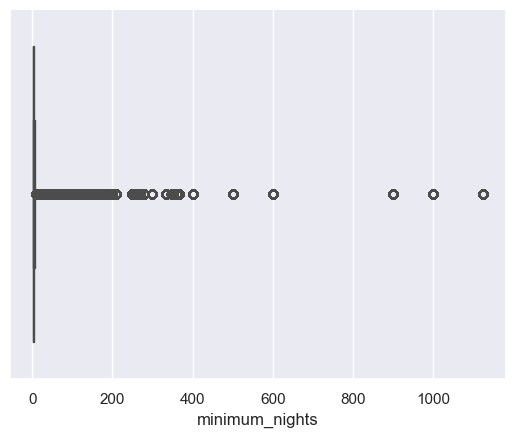

In [13]:
sns.boxplot(x=dfCalendar['minimum_nights'])